In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as forest
from catboost import CatBoostClassifier as catboost
from  xgboost import XGBClassifier as xgb
from lightgbm import LGBMClassifier as lgb
from catboost import Pool

import torch
from torch import nn
from torch import optim

In [94]:
test = pd.read_csv("C:\\Users\\Vitaliy\\OneDrive\\Рабочий стол\\vk_ml\\test_df.csv")
test

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,10655,9,0,0,1,20,4,40,0,0,...,0.148830,0.196644,0.029267,0,0,0,0.03674,0.0,0.0,0
1,10655,9,0,0,1,20,4,40,0,0,...,0.119724,0.174199,0.020856,0,0,0,0.00000,0.0,0.0,0
2,10655,9,0,0,1,20,4,40,0,0,...,0.160606,0.198780,0.031925,0,0,0,0.00000,0.0,0.0,0
3,10655,9,0,0,1,20,4,40,0,0,...,0.180191,0.187882,0.033855,0,0,0,0.00000,0.0,0.0,0
4,10655,9,0,0,1,20,4,40,0,0,...,0.117308,0.153586,0.018017,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,493078,9,0,0,0,9,4,35,0,0,...,0.341683,0.067348,0.023012,0,0,0,0.46108,0.0,0.0,0
1525,493078,9,0,0,0,9,4,35,0,0,...,0.270293,0.049000,0.013244,0,0,0,0.03674,0.0,0.0,0
1526,493078,9,0,0,0,9,4,35,0,0,...,0.372268,0.069882,0.026015,0,0,0,0.14540,0.0,0.0,1
1527,493078,9,0,0,0,9,4,35,0,0,...,0.355755,0.077469,0.027560,0,0,0,0.21288,0.0,0.0,1


In [95]:
train = pd.read_csv("C:\\Users\\Vitaliy\\OneDrive\\Рабочий стол\\vk_ml\\train_df.csv")
train

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


Сразу поделим данные на train и test, чтобы при предобработке не было утечки данных

In [96]:
X, y = train.drop(['target'], axis=1), train.target
X_test, y_test = test.drop(['target'], axis=1), test.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

Теперь давайте немного изучим рапсределение данных, посмотрим долю меток класса 1 и класса 0

In [6]:
print(f"Доля положительных классов в train = {round(y_train[y_train == 1].sum() / y_train.shape[0], 3)}")
print(f"Доля положительных классов в val = {round(y_val[y_val == 1].sum() / y_val.shape[0], 3)}")

Доля положительных классов в train = 0.022
Доля положительных классов в val = 0.021


Спроецируем данные на плоскость и посмотрим на их распределение

In [7]:
pca = PCA(n_components=2)
x = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.74687087, 0.16770971])

In [8]:
x = list(x)
y = list(y_train)
for i in range(len(x)):
    x[i] = list(x[i])
    x[i].append(y[i])

In [9]:
df = pd.DataFrame(x)
df.rename({0 : "one", 1 : "two", 2 : 'target'}, axis=1, inplace=True)
df.head()

,one,two,target
0,5.858171,-4.201943,0
1,7.892302,-4.187511,0
2,33.882692,-4.200385,0
3,10.911707,6.903891,0
4,-0.213618,-3.990863,1


Text(0.5, 1.0, 'Распределение данных на плоскости')

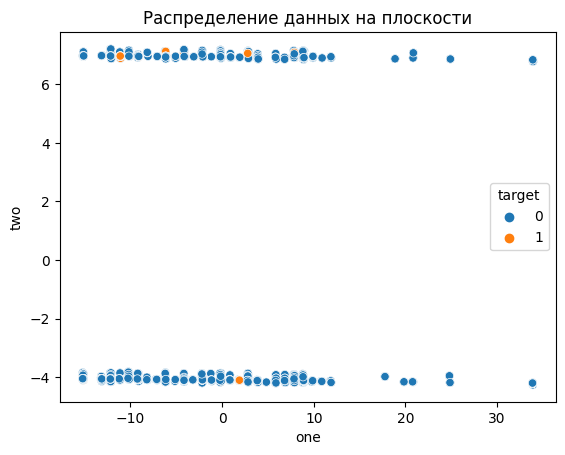

In [10]:
sns.scatterplot(x=df['one'], y=df['two'], hue=df['target']).set_title("Распределение данных на плоскости")

Text(0.5, 1.0, 'Распределение данных ниже 0 по 2 компоненте')

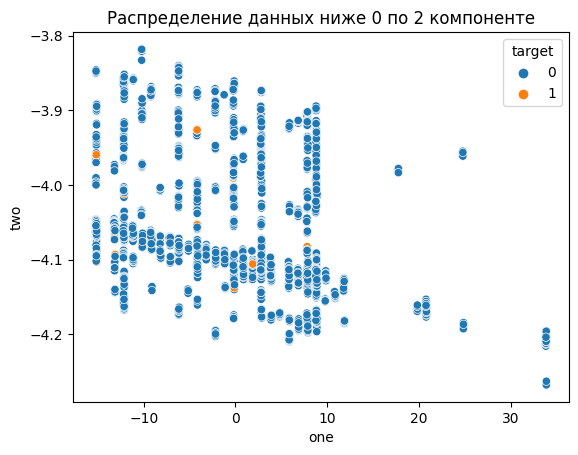

In [11]:
df2 = df[df['two'] < 0]
sns.scatterplot(x=df2['one'], y=df2['two'], hue=df2['target']).set_title("Распределение данных ниже 0 по 2 компоненте")

Text(0.5, 1.0, 'Распределение данных выше 0 по 2 компоненте')

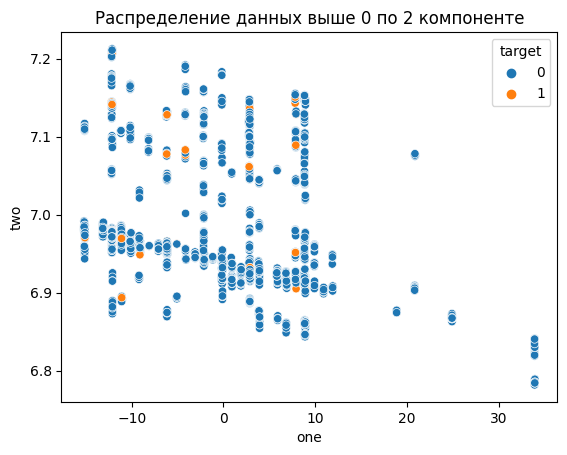

In [12]:
df2 = df[df['two'] > 0]
sns.scatterplot(x=df2['one'], y=df2['two'], hue=df2['target']).set_title("Распределение данных выше 0 по 2 компоненте")

Давайте отберем признаки с дисперсией близкой или равной 0

In [13]:
dt = dict()
for col in X_train.columns:
    std = X_train[col].var()
    dt[col] = std

Посмотрим на 30 признаков с самой низкой дисперсией

In [14]:
dt['feature_70']

0.007998959566512032

In [15]:
sorted(dt.values())[:30]

[0.0,
 0.0,
 0.0,
 0.0,
 4.442351677032887e-05,
 0.00024151980913455755,
 0.00028716909807867717,
 0.0007978712374117227,
 0.0010855227916205714,
 0.0011180902784332612,
 0.0013404310768183078,
 0.001644524126518323,
 0.001653341366628615,
 0.0018225463128165712,
 0.001854357044339622,
 0.0019768521917648456,
 0.0020291649122023523,
 0.0022140032575697567,
 0.003086321781869644,
 0.004028906177660334,
 0.00636367314568096,
 0.007998959566512032,
 0.00816181839300343,
 0.00947736903485936,
 0.009779801003957131,
 0.010228126247793378,
 0.012938657139629944,
 0.013511960705188017,
 0.016747868025132236,
 0.017589249347530634]

удалим те колонки, где дисперсия меньше 0.01 и мало уникальных элементов

In [78]:
min = 0.01
for key, value in dt.items():
    if dt[key] < min and len(X_train[key].unique()) < 10:
        X_train.drop([key], axis=1, inplace=True)
        X_val.drop([key], axis=1, inplace=True)

Осталось 74 признака из 80

In [79]:
X_train.shape

(10556, 75)

Стандартизируем данные

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Теперь попробуем обучить модели классического ML, начнем с SVC

In [81]:
def predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    ndcg = ndcg_score(y_test.reshape(1, -1), y_pred_proba.reshape(1, -1), k=X_test.shape[0])
    print(f'модель = {model}, NDCG = {ndcg}')

In [68]:
model = forest(n_estimators=100,  max_depth=10)
predict(model, X_train, y_train, X_val, y_val)

модель = RandomForestClassifier(max_depth=10), NDCG = 0.5256801566390146


In [67]:
model = SVC(kernel = 'rbf', probability=True)
predict(model, X_train, y_train, X_val, y_val)

модель = SVC(probability=True), NDCG = 0.49715356079554185


In [70]:
model = catboost(iterations=100,  learning_rate=0.1,  depth=5,  loss_function='Logloss', verbose=False)
predict(model, X_train, y_train, X_val, y_val)

модель = <catboost.core.CatBoostClassifier object at 0x000001CFFBE3C3C8>, NDCG = 0.597189191223467


In [72]:
model = xgb(objective='binary:logistic',n_estimators=100,max_depth=6,learning_rate=0.1)
predict(model, X_train, y_train, X_val, y_val)

модель = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...), NDCG = 0.5655034726082753


In [73]:
model = lgb(objective='binary', metric='binary_logloss')
predict(model, X_train, y_train, X_val, y_val)

[LightGBM] [Info] Number of positive: 229, number of negative: 10327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12451
[LightGBM] [Info] Number of data points in the train set: 10556, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.021694 -> initscore=-3.808795
[LightGBM] [Info] Start training from score -3.808795
модель = LGBMClassifier(metric='binary_logloss', objective='binary'), NDCG = 0.5779580692959038


Лучшее качество показал CatBoost

Попробуем обучить полносвязную нейросеть

In [154]:
class Model(nn.Module):
    def __init__(self, input, hidden):
        super().__init__()

        self.fc1 = nn.Linear(input, hidden//2)
        self.fc2 = nn.Linear(hidden//2, hidden)
        self.fc3 = nn.Linear(hidden, hidden//2)
        self.fc4 = nn.Linear(hidden//2, hidden//4)
        self.fc5 = nn.Linear(hidden//4, 1)
        self.relu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.sigmoid(self.fc5(x))
        return x

In [155]:
def validation(model, X_val, y_val, treshold):
    X_val_pt = torch.tensor(X_val, dtype=torch.float32)
    y_val_pt = torch.tensor(np.array(y_val), dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        pred_proba = model(X_val_pt)
        ans = np.where(pred_proba[:] > treshold, 1, 0)
        score = ndcg_score(y_true=y_val_pt.reshape(1, -1), y_score=ans.reshape(1, -1))
    return score

In [163]:
def train(X_train, y_train, epochs, batch_size, treshold):
    X_train_pt = torch.tensor(X_train, dtype=torch.float32)
    y_train_pt = torch.tensor(y_train, dtype=torch.float32)
    input_size = X_train.shape[1]

    model = Model(input_size, 256)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scores = []
    for epoch in range(epochs):
        losses = []
        for i in range(0, len(X_train), batch_size):
            inputs = X_train_pt[i:i + batch_size]
            targets = y_train_pt[i:i + batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            losses.append(loss.detach())
            loss.backward()
            optimizer.step()
        '''if (epoch+1) % 5 == 0 or epoch == 0:
            print(f"epoch = {epoch+1}, loss = {np.mean(losses)}")'''
        score = validation(model, X_val, y_val, treshold)
        scores.append(score)
    return np.max(scores)
        

In [166]:
tresholds = [i / 10 for i in range(1, 10)]
for treshold in tresholds:
    print(f"treshold = {treshold}, ndcg = {train(X_train, y_train, epochs=40, batch_size=128, treshold = treshold)}")

treshold = 0.05, ndcg = 0.5122525759902418
